# **FGV EESP**

- ## Análise de Dados Econômicos - Brasil
---



### **Bibliotecas**

In [ ]:
# Gráficos de sazonalidade
install.packages("forecast")

# Estatística descritiva
install.packages("stargazer")

# Painéis com gráficos
install.packages("gridExtra")

In [ ]:
library(dplyr)
library(forecast)
library(ggplot2)
library(gridExtra)
library(httr)
library(lubridate)
library(readxl)
library(stargazer)
library(tidyverse)
library(zoo)

### **Dados**

In [3]:
# Caminho do arquivo original
file_path <- "https://github.com/matheusrmorgado/inflation-expectation/raw/main/data/public_data.xlsx"

# Download do arquivo
download.file(file_path, "public_data.xlsx")

# Ler o arquivo Excel e converter em dataframe
df_public_data <- as.data.frame(read_excel("public_data.xlsx"))

# Converter year e month_name
df_public_data <- df_public_data %>%
  mutate(year = as.numeric(year),  # Converter year para numérico
         month_name = factor(month_name, levels = month.abb, ordered = TRUE))  # Converter month_name para um fator ordenado

# Converter month_date
df_public_data$month_date <- ymd(df_public_data$month_date)  # Converter month_date para formato Date

# Lista de variáveis que você deseja transformar em séries temporais
vars_to_convert <- c("month", "market_inflation_expectation", "consumer_inflation_expectation", "ipca", "selic", "ibc_br", "gov_debt", "household_debt", "household_income", "pib", "usd_brl", "ipca_lag", "selic_lag")

# Loop para transformar as variáveis em séries temporais
for (var in vars_to_convert) {
  df_public_data[[var]] <- ts(df_public_data[[var]], start = c(2006, 1), frequency = 12)
}

### **Estatística Descritiva**

In [4]:
stargazer(df_public_data, digits = 2, type = "text")


Statistic                       N      Mean       St. Dev.       Min           Max     
---------------------------------------------------------------------------------------
year                           210   2,014.26       5.07        2,006         2,023    
month                          210   2,014.71       5.06       2,006.00     2,023.42   
market_inflation_expectation   210     4.85         0.93         2.96         7.01     
consumer_inflation_expectation 210     6.95         1.66         4.30         11.40    
ipca                           210     5.70         2.24         1.88         12.13    
selic                          210    10.01         3.57         1.90         17.65    
ibc_br                         210    136.16        8.61        113.48       149.30    
gov_debt                       210    45.31        10.19        30.71         66.39    
household_debt                 210    36.35         7.57        19.89         50.09    
household_income               

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


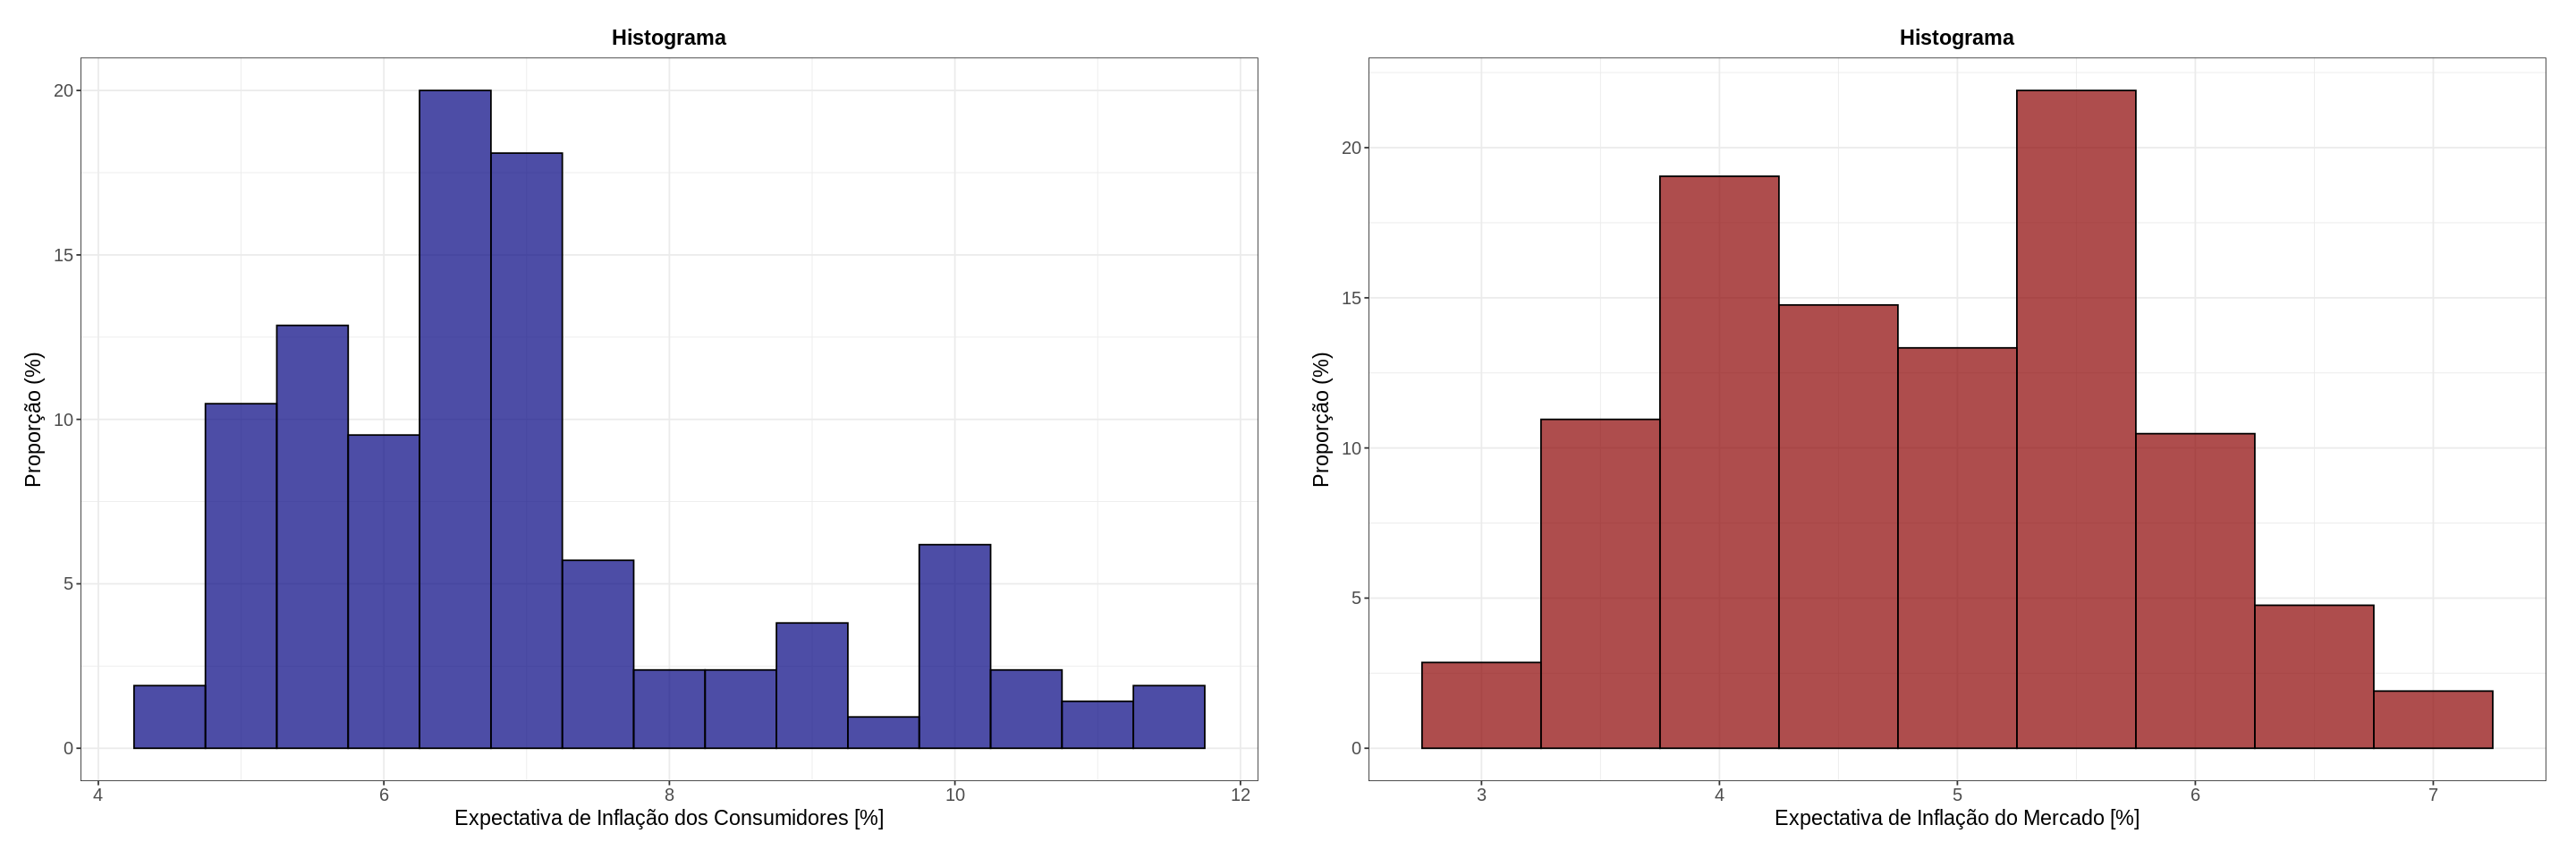

In [5]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 24, repr.plot.height = 8)

# Gráfico 1: Histograma da Expectativa de Inflação dos Consumidores
plot1 <- ggplot(df_public_data, aes(x = consumer_inflation_expectation, y = 100 * after_stat(count) / sum(after_stat(count)))) +
  geom_histogram(binwidth = 0.5, color = "black", fill = "navy", alpha = 0.7) +
  labs(x = "Expectativa de Inflação dos Consumidores [%]", y = "Proporção (%)", title = "Histograma") +
  theme_bw() +
  theme(
    plot.title = element_text(size = 14, face = "bold", hjust = 0.5),  # Ajuste o tamanho do título
    axis.text = element_text(size = 12),  # Ajuste o tamanho do texto do eixo
    axis.title.y = element_text(size = 14, vjust = 2),
    axis.title.x = element_text(size = 14),
    plot.caption = element_text(size = 10),  # Ajuste o tamanho da legenda
    plot.margin = margin(20, 20, 20, 20)
  )

# Gráfico 2: Histograma da Expectativa de Inflação do Mercado
plot2 <- ggplot(df_public_data, aes(x = market_inflation_expectation, y = 100 * after_stat(count) / sum(after_stat(count)))) +
  geom_histogram(binwidth = 0.5, color = "black", fill = "darkred", alpha = 0.7) +
  labs(x = "Expectativa de Inflação do Mercado [%]", y = "Proporção (%)", title = "Histograma") +
  theme_bw() +
  theme(
    plot.title = element_text(size = 14, face = "bold", hjust = 0.5),
    axis.text = element_text(size = 12),
    axis.title.y = element_text(size = 14, vjust = 2),
    axis.title.x = element_text(size = 14),
    plot.caption = element_text(size = 10),
    plot.margin = margin(20, 20, 20, 20)
  )

# Criar o painel com os gráficos lado a lado
grid.arrange(plot1, plot2, ncol = 2)

### **Visualização de Dados**

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


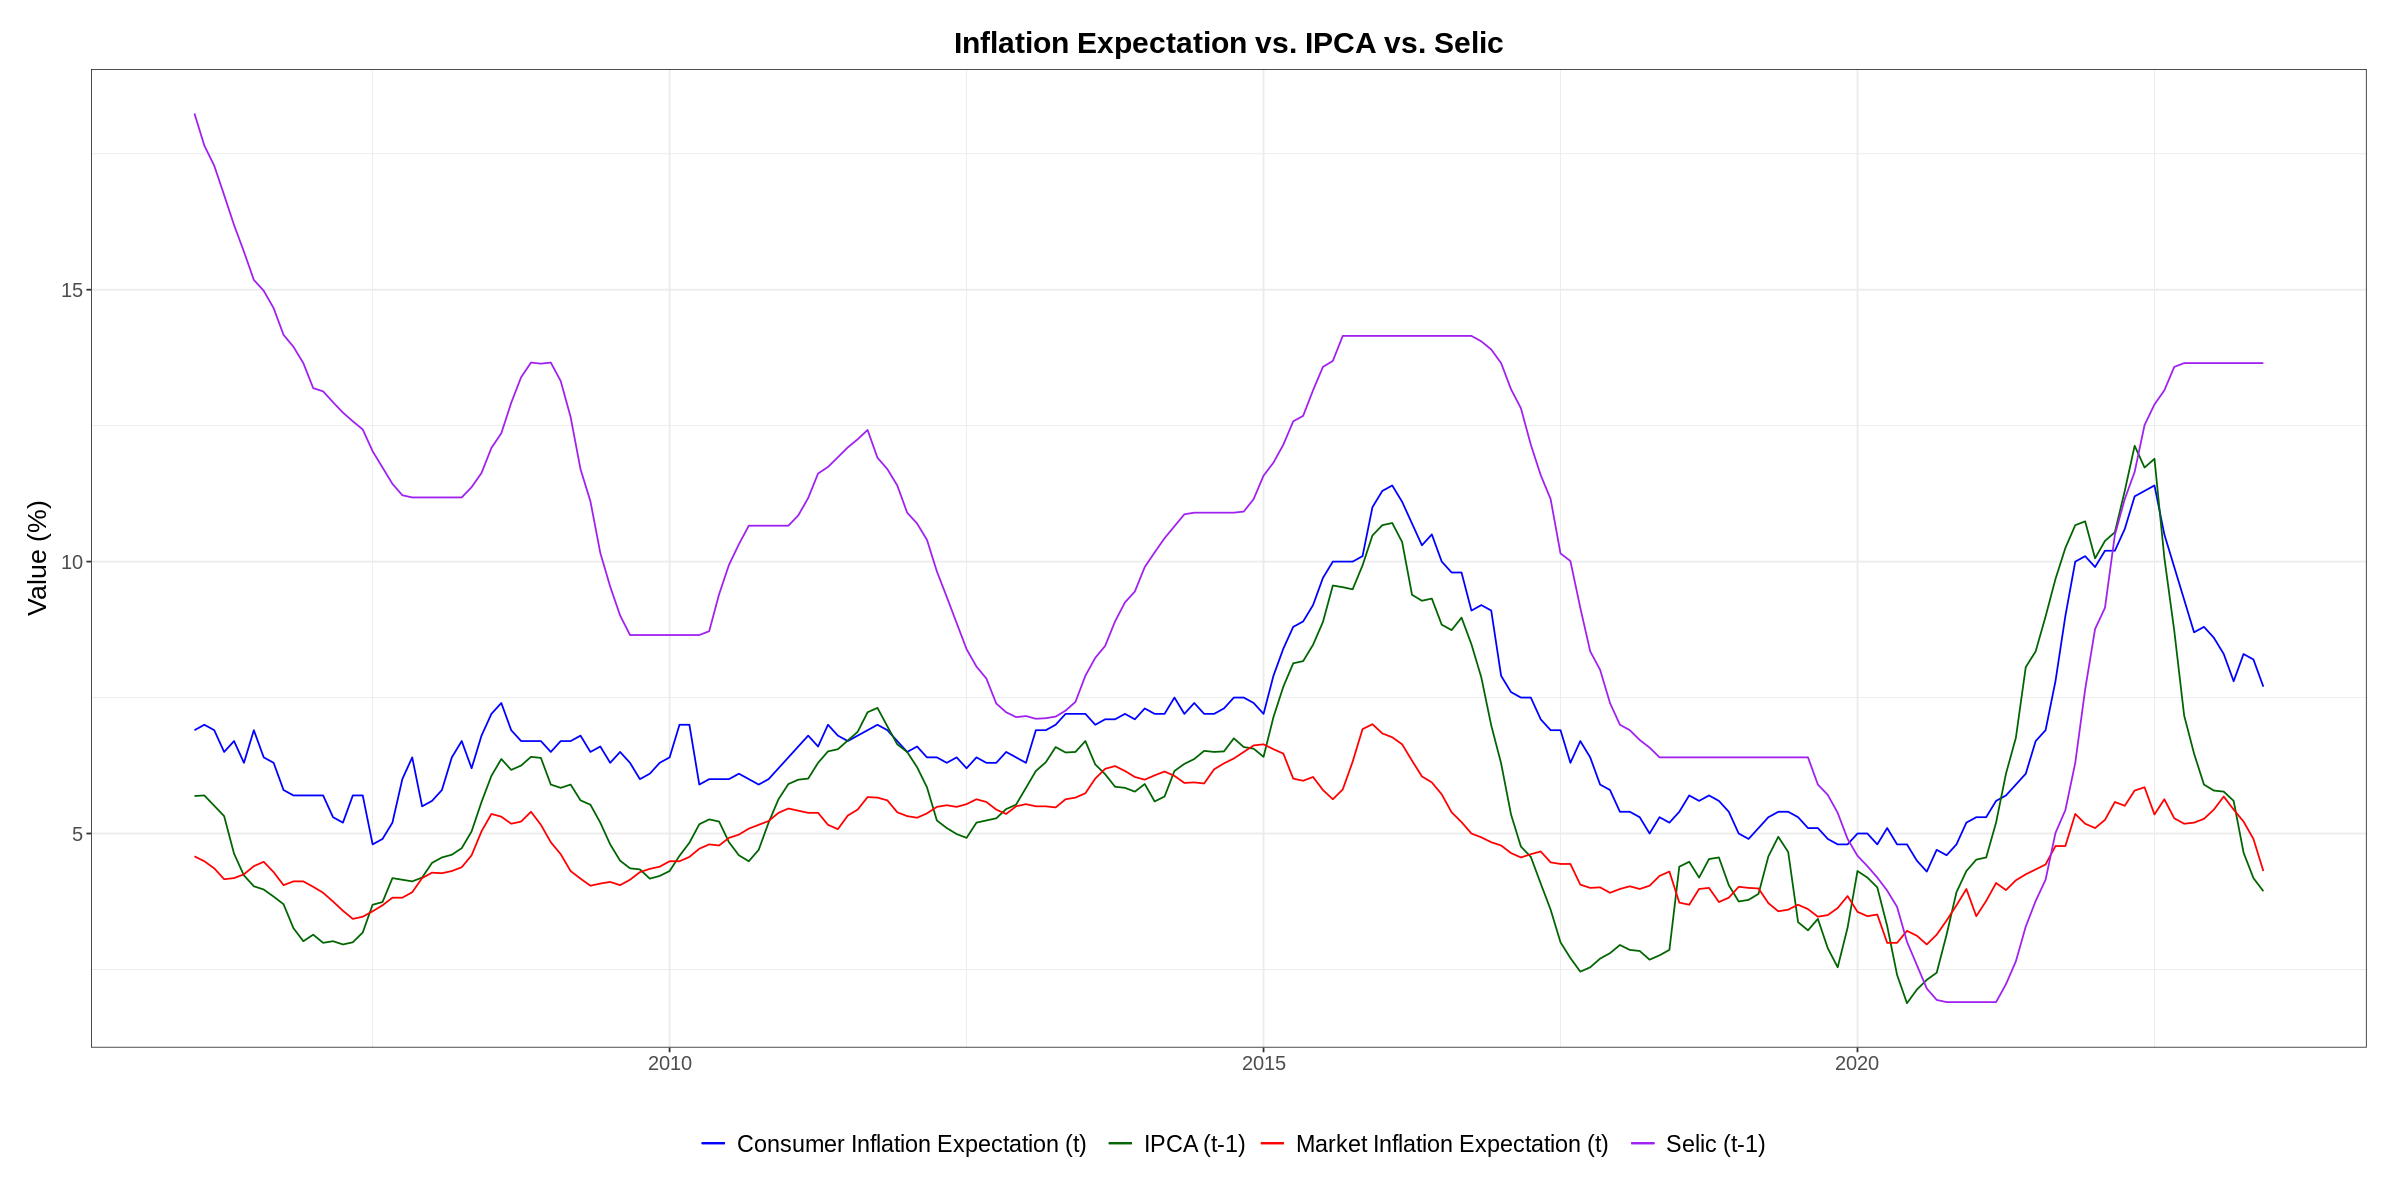

In [6]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Plotar as séries temporais de "consumer_inflation_expectation" e "market_inflation_expectation"
ggplot(df_public_data) +
  geom_line(aes(x = month, y = consumer_inflation_expectation, color = "Consumer Inflation Expectation (t)")) +
  geom_line(aes(x = month, y = ipca_lag, color = "IPCA (t-1)")) +
  geom_line(aes(x = month, y = market_inflation_expectation, color = "Market Inflation Expectation (t)")) +
  geom_line(aes(x = month, y = selic_lag, color = "Selic (t-1)")) +
  labs(x = "", y = "Value (%)", title = "Inflation Expectation vs. IPCA vs. Selic") +
  scale_color_manual(values = c("blue", "darkgreen", "red", "purple"), name = "") +
  theme_bw() +
  theme(
    legend.position = "bottom",
    legend.text = element_text(size = 14),
    legend.title = element_blank(),
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.text = element_text(size = 12),
    axis.title.y = element_text(size = 16, vjust = 2),
    axis.title.x = element_text(size = 14),
    plot.caption = element_text(size = 10),
    plot.margin = margin(20, 20, 20, 20)
  )

#### **Sazonalidade**

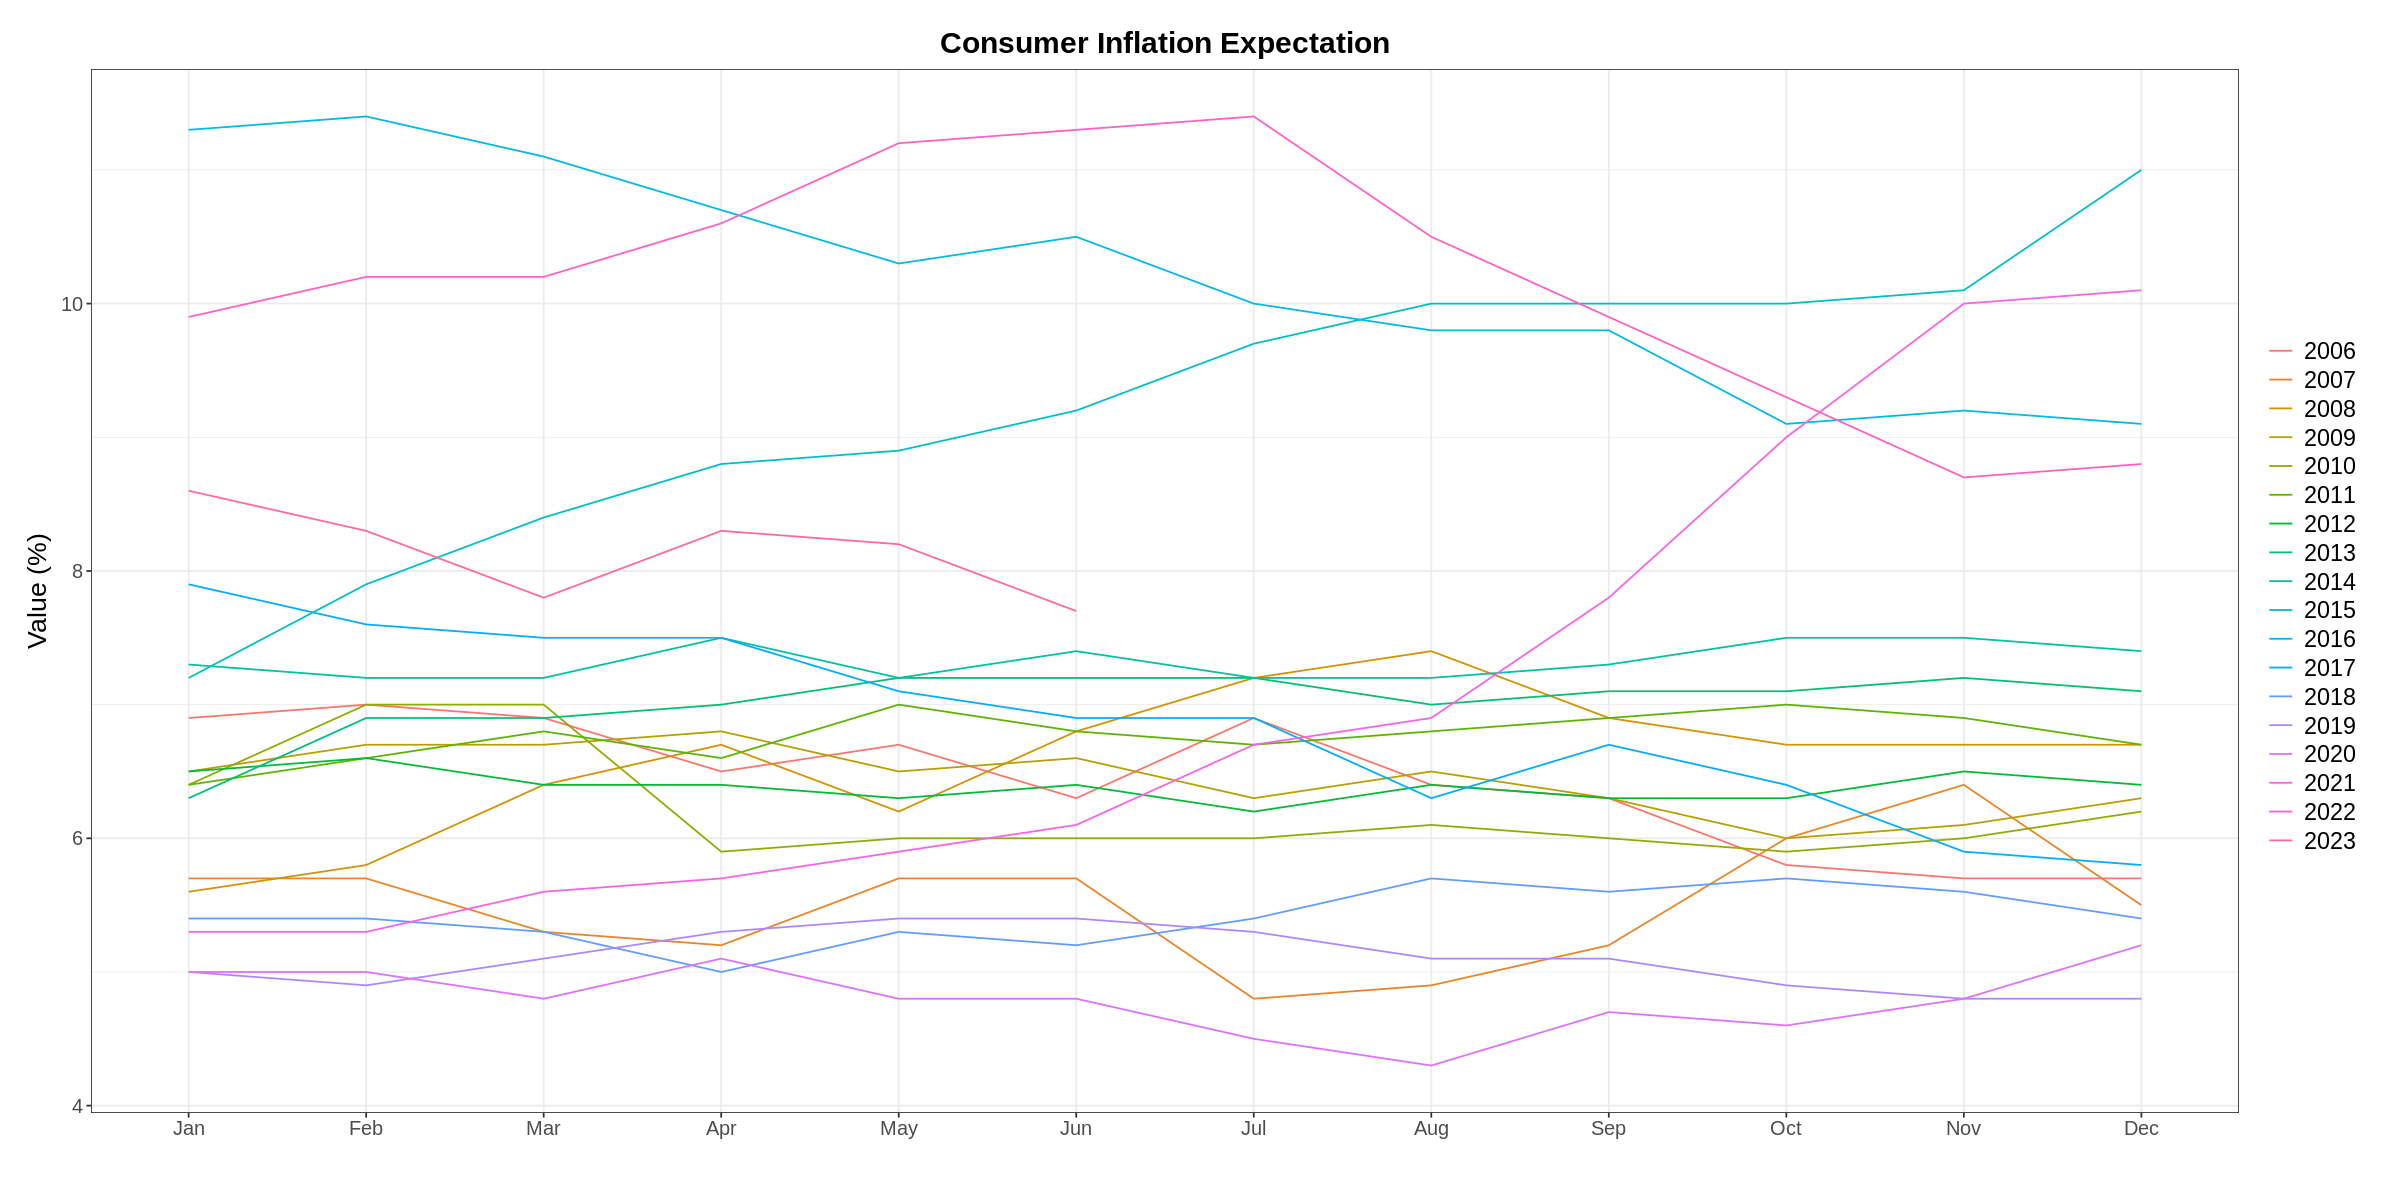

In [7]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Criar o objeto de plotagem usando ggplot
p <- ggseasonplot(df_public_data$consumer_inflation_expectation) +
  labs(x = "", y = "Value (%)", title = "Consumer Inflation Expectation") +
  theme_bw() +
  theme(
    legend.position = "right",
    legend.text = element_text(size = 14),
    legend.title = element_blank(),
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.text = element_text(size = 12),
    axis.title.y = element_text(size = 16, vjust = 2),
    axis.title.x = element_text(size = 14),
    plot.caption = element_text(size = 10),
    plot.margin = margin(20, 20, 20, 20)
  )

# Exibir o gráfico
print(p)

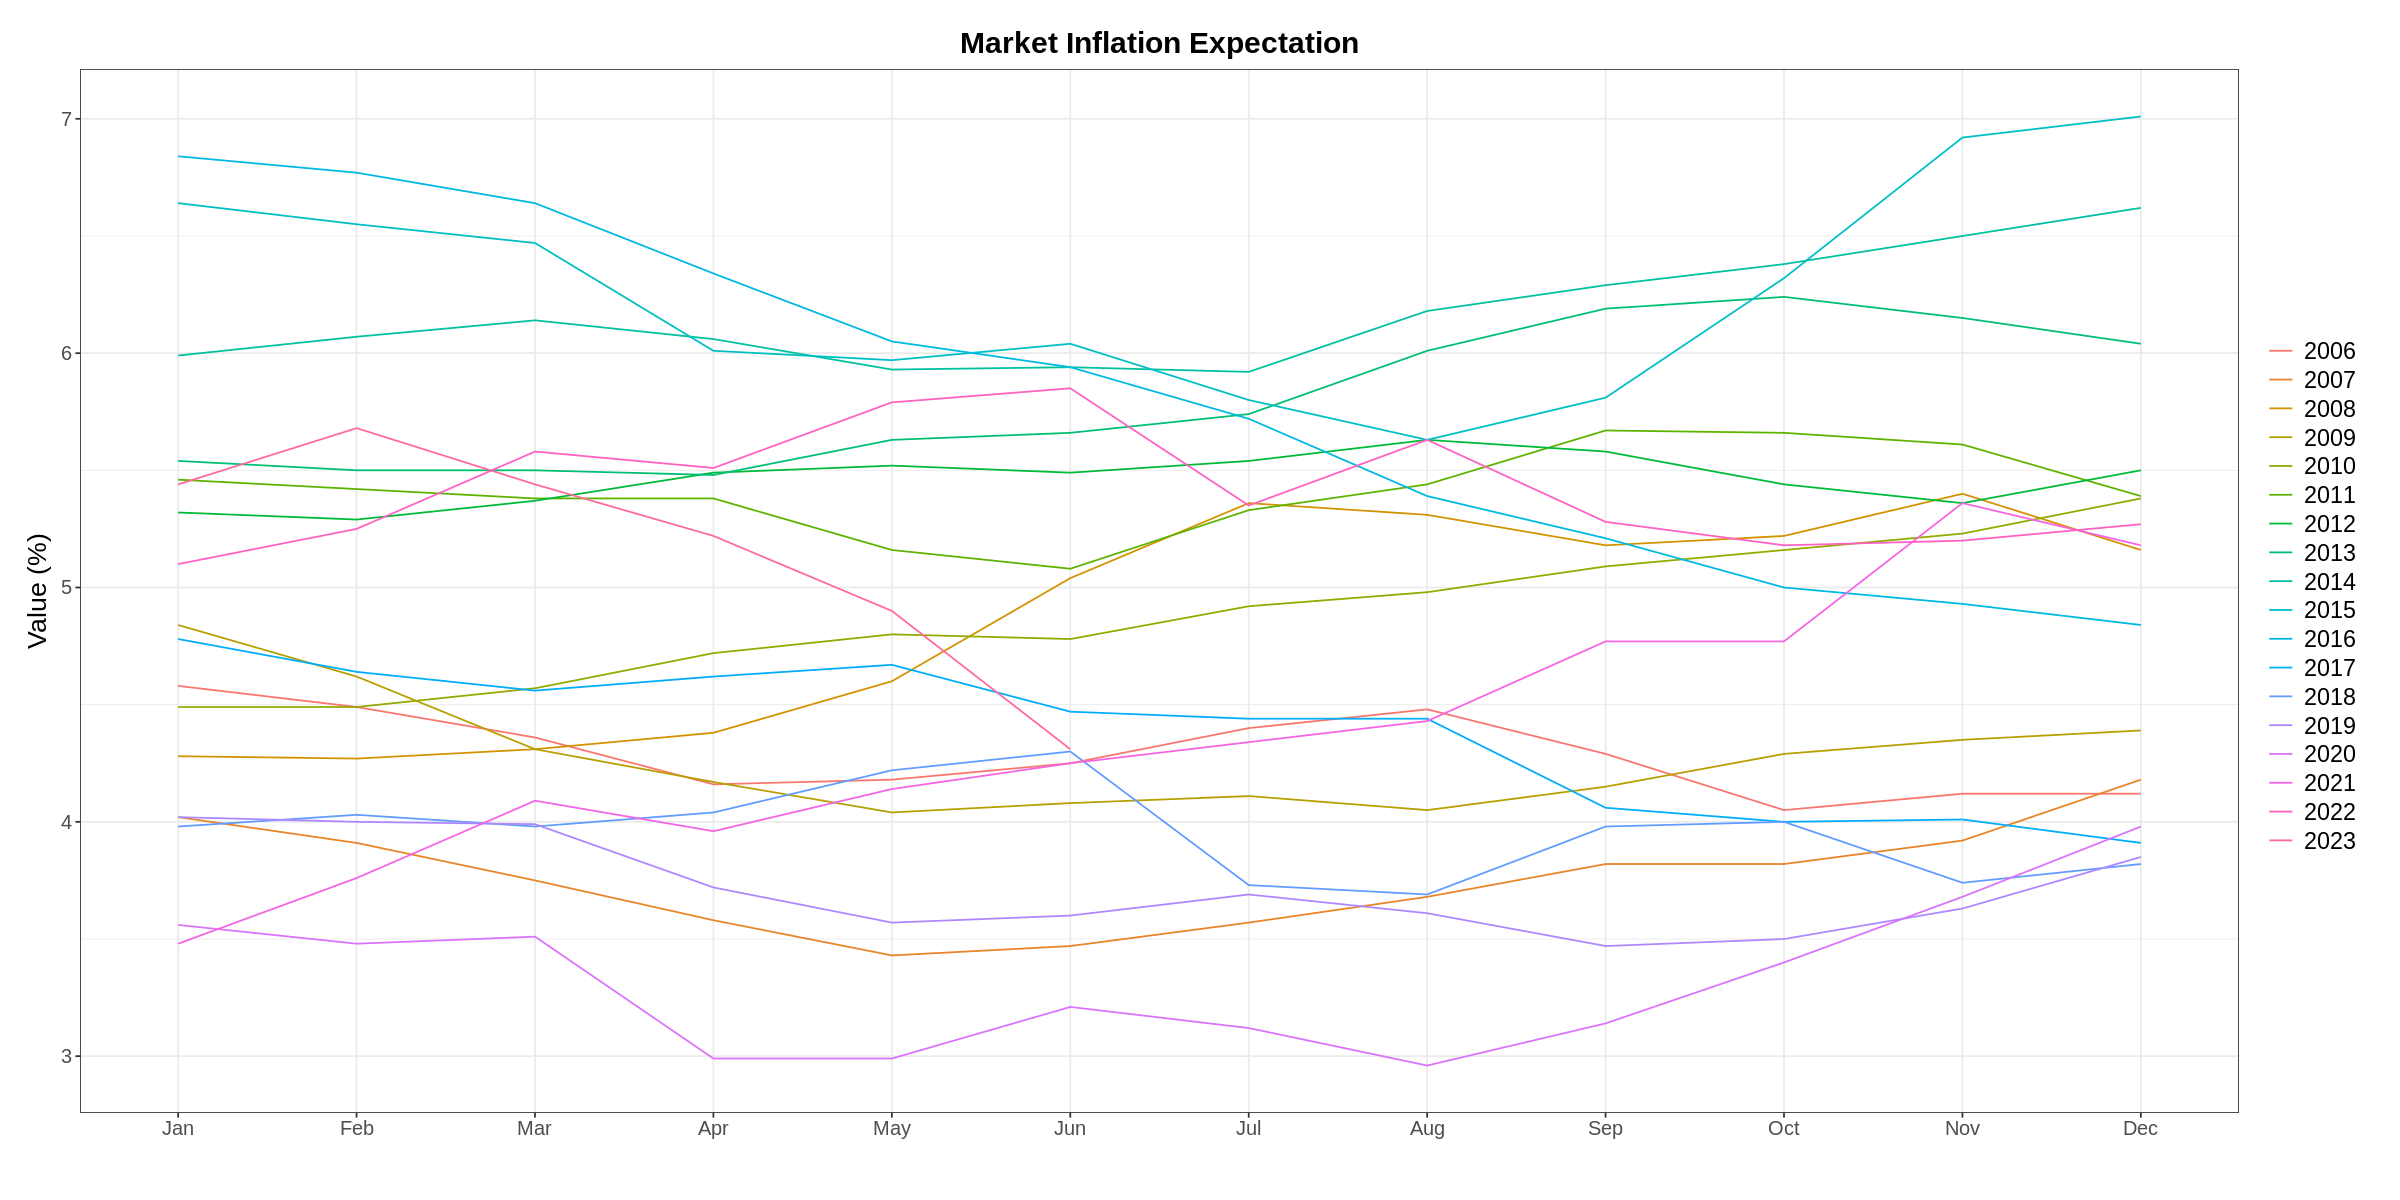

In [8]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Criar o objeto de plotagem usando ggplot
p <- ggseasonplot(df_public_data$market_inflation_expectation) +
  labs(x = "", y = "Value (%)", title = "Market Inflation Expectation") +
  theme_bw() +
  theme(
    legend.position = "right",
    legend.text = element_text(size = 14),
    legend.title = element_blank(),
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.text = element_text(size = 12),
    axis.title.y = element_text(size = 16, vjust = 2),
    axis.title.x = element_text(size = 14),
    plot.caption = element_text(size = 10),
    plot.margin = margin(20, 20, 20, 20)
  )

# Exibir o gráfico
print(p)

#### **Variáveis Macroeconômicas**

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of typ

TableGrob (4 x 2) "arrange": 8 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]
4 4 (2-2,2-2) arrange gtable[layout]
5 5 (3-3,1-1) arrange gtable[layout]
6 6 (3-3,2-2) arrange gtable[layout]
7 7 (4-4,1-1) arrange gtable[layout]
8 8 (4-4,2-2) arrange gtable[layout]


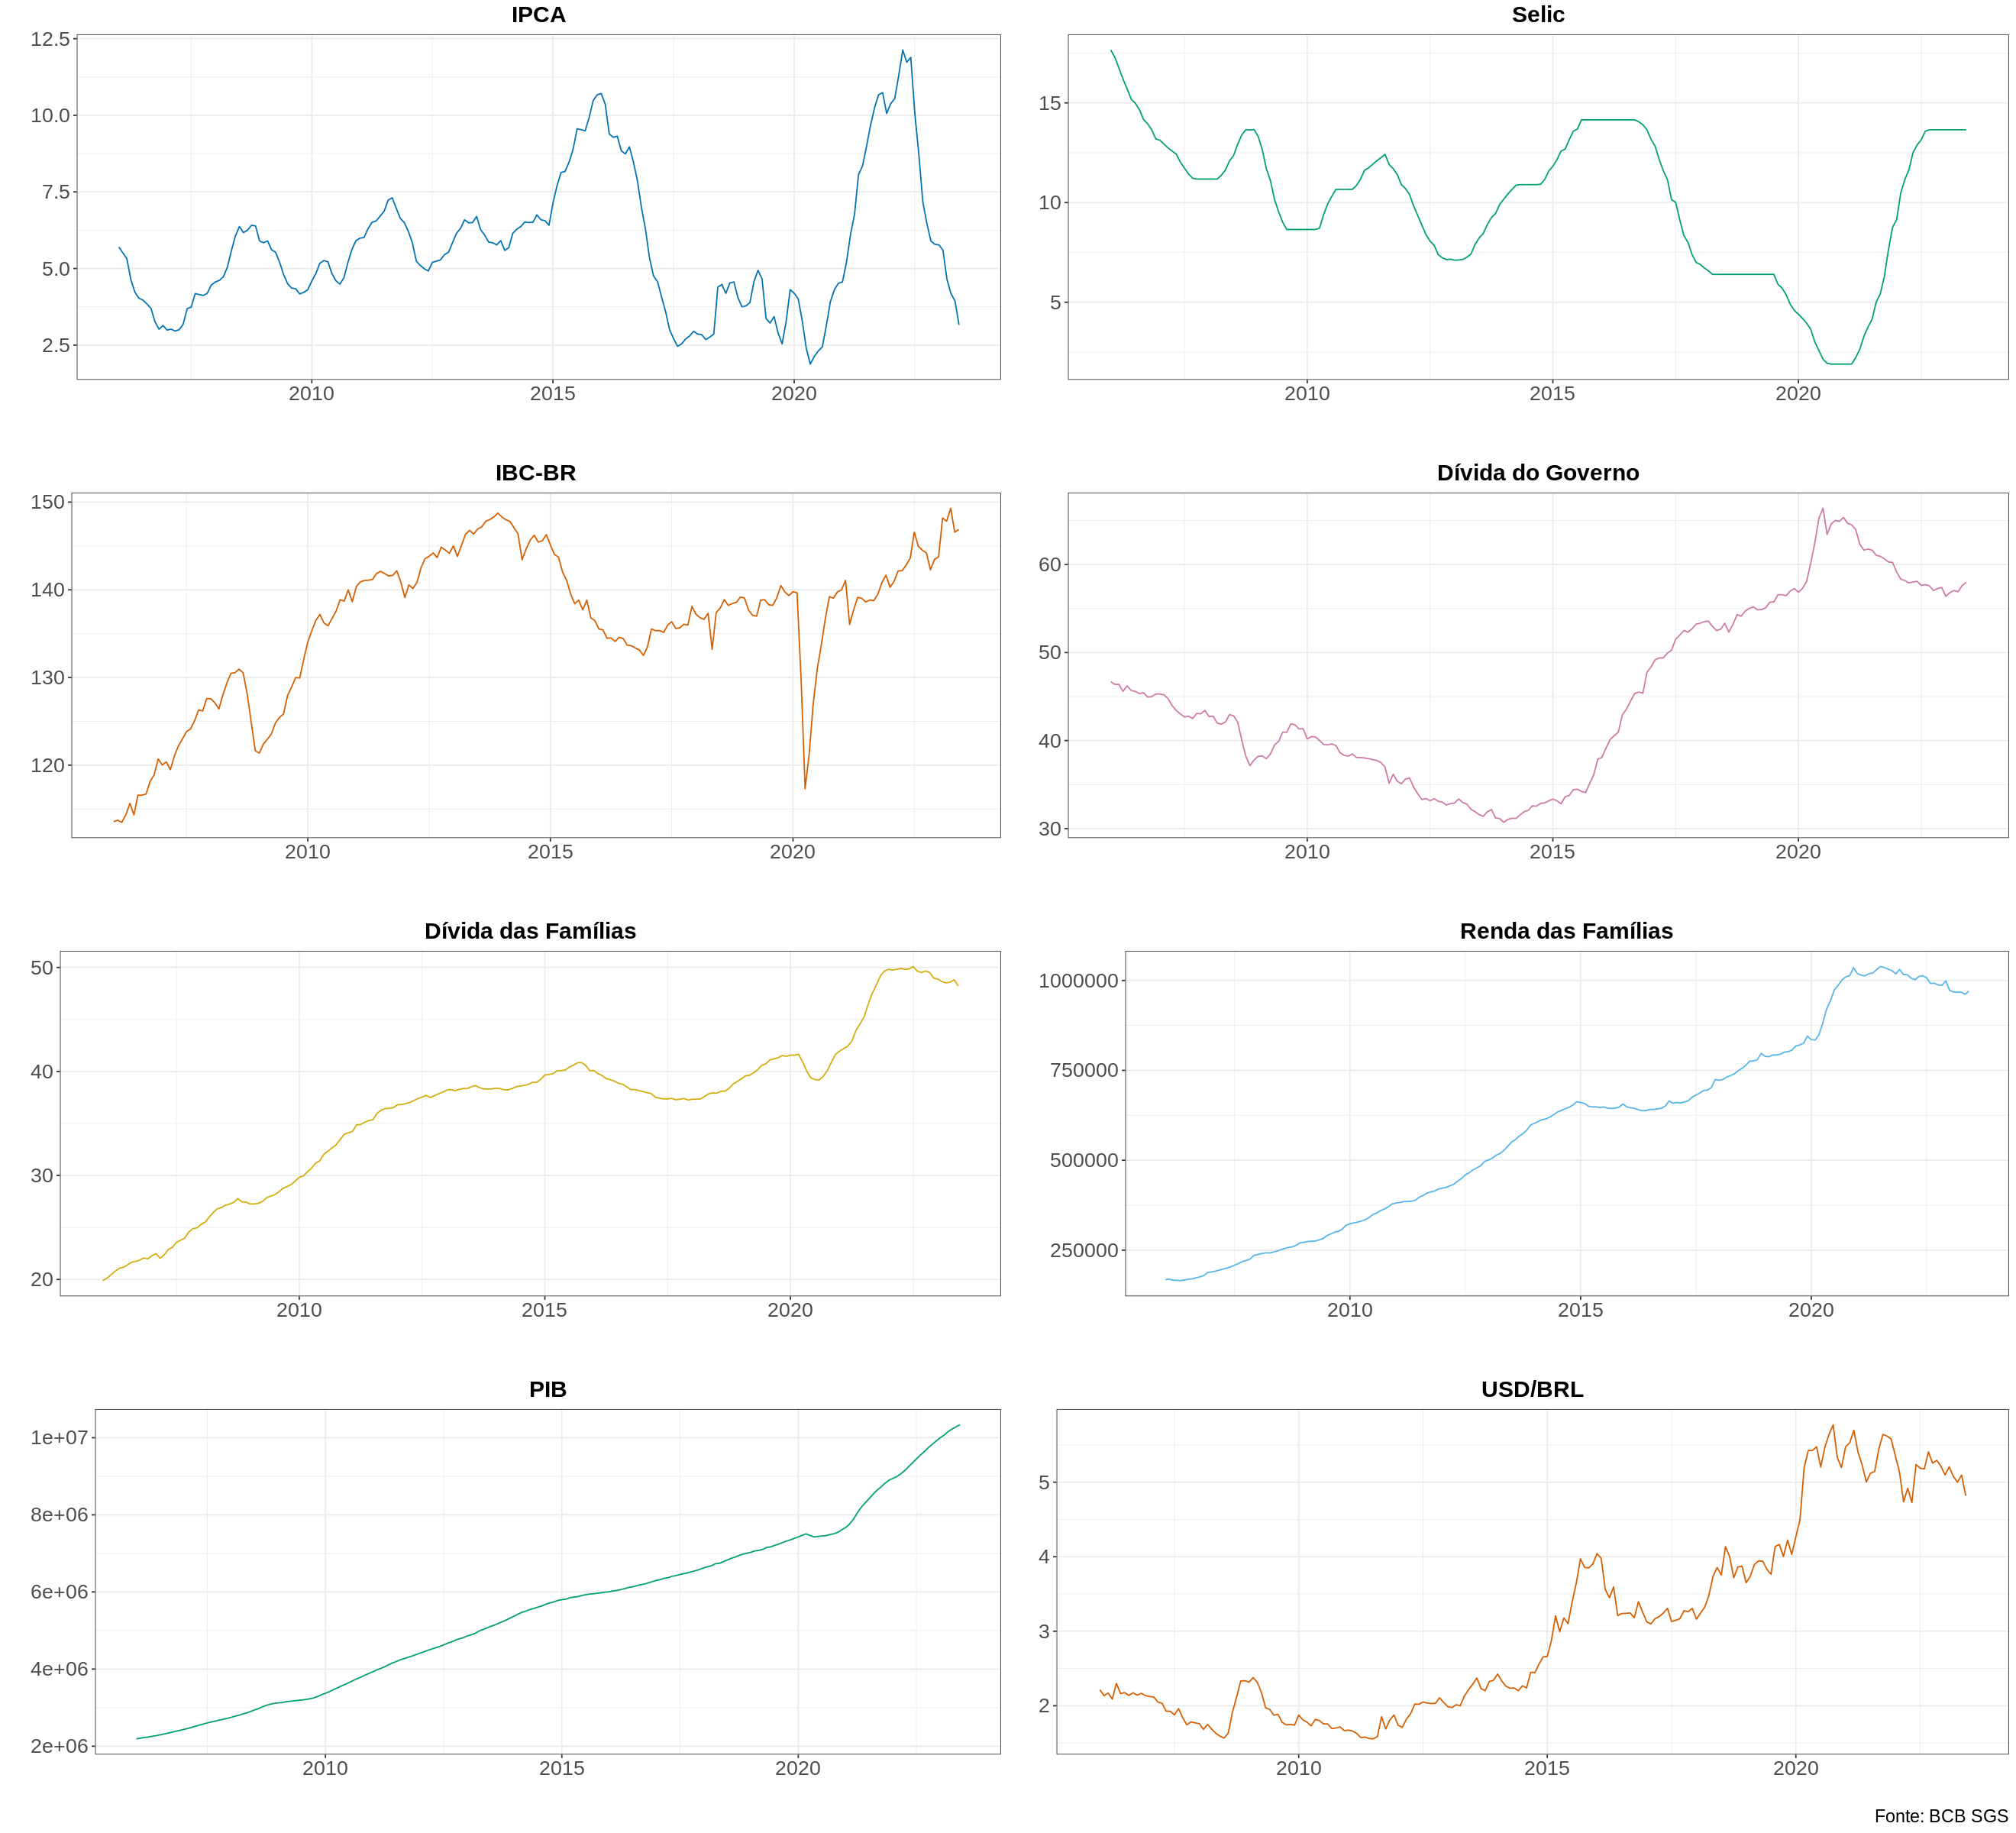

In [9]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 22, repr.plot.height = 20)  # Ajuste a altura para acomodar os 8 gráficos

# Lista de nomes das métricas
metricas <- c("ipca", "selic", "ibc_br", "gov_debt", "household_debt", "household_income", "pib", "usd_brl")

# Lista de títulos das métricas
titulos <- c("IPCA", "Selic", "IBC-BR", "Dívida do Governo", "Dívida das Famílias", "Renda das Famílias", "PIB", "USD/BRL")

# Lista de cores personalizadas
cores <- c("#0072B2", "#009E73", "#D55E00", "#CC79A7", "#D4AC0D", "#56B4E9", "#009E73", "#D55E00")

# Criar uma lista para armazenar os gráficos
graficos <- list()

# Criar os gráficos para cada métrica
for (i in 1:length(metricas)) {
  nome_metrica <- tolower(metricas[i])
  caption <- if (i == length(metricas)) "Fonte: BCB SGS" else ""  # Adicione a fonte apenas para o último gráfico
  grafico <- ggplot(df_public_data) +
    geom_line(aes(x = month, y = .data[[metricas[i]]]), color = cores[i]) +
    labs(x = "", y = "", title = titulos[i], caption = caption) +
    theme_bw() +
    theme(legend.position = "none",
          plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
          axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.caption = element_text(size = 14))
  graficos[[i]] <- grafico
}

# Combinar os gráficos em um único painel
painel <- do.call(grid.arrange, c(graficos, ncol = 2))

# Apresentar o painel
print(painel)